# Analyzing Singapore's AirBnB listings
Airbnb, Inc. is an online marketplace for organizing or offering accommodation, primarily homestays, or tourism experiences. The company does not own any of the property listings, nor does it host events; it acts as a broker, receiving commissions from each booking. The business is based in San Francisco, California, USA.

The company was founded after the creators installed an air mattress in their living room, essentially transforming their apartment into a bed and breakfast, in order to account for the high cost of rent in San Francisco; Airbnb is a simplified version of its original name, AirBedandBreakfast.com.

In this project we are going to use the CRISP - DM technique to answer a few questions:

    1. What are room types do guests prefer the most?
    2. Which neighbourhood of Singapore has the maximum number of properties?
    3. Which neighbourhood is the most expensive?
    4. Which area of singapore has the maximum reviewed properites?
    5. Which properties are availaible for how many days?
    6. What are the basic amenities offered and is the price of the property associated with luxury amenities?

In [1]:
#importing all the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
#Reading the data 
dlistings = pd.read_csv('listings.csv',engine='python')
dlistings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

# Initializing Data

In [3]:
#Removing the useful part
listings = dlistings[['name', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'latitude', 'longitude','room_type', 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365','amenities']].copy()

In [4]:
listings.head()

name neighbourhood_group_cleansed  \
0    COZICOMFORT LONG TERM STAY ROOM 2                 North Region   
1      Pleasant Room along Bukit Timah               Central Region   
2                          COZICOMFORT                 North Region   
3  Ensuite Room (Room 1 & 2) near EXPO                  East Region   
4      B&B  Room 1 near Airport & EXPO                  East Region   

  neighbourhood_cleansed  latitude  longitude     room_type    price  \
0              Woodlands   1.44255  103.79580  Private room   $87.00   
1            Bukit Timah   1.33235  103.78521  Private room   $80.00   
2              Woodlands   1.44246  103.79667  Private room   $72.00   
3               Tampines   1.34541  103.95712  Private room  $214.00   
4               Tampines   1.34567  103.95963  Private room   $99.00   

   minimum_nights  number_of_reviews  reviews_per_month  \
0             180                  1               0.01   
1              90                 18               0.25   
2               6                 20               0.19   
3               1                 20               0.20   
4               1                 24               0.23   

   calculated_host_listings_count  availability_365  \
0                               2               365   
1                               1               365   
2                               2               365   
3                               8               365   
4                               8               365   

                                           amenities  
0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  
1  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  
2  {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...  
3  {TV,Wifi,"Air conditioning",Kitchen,"Pets live...  
4  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 13 columns):
name                              7712 non-null object
neighbourhood_group_cleansed      7713 non-null object
neighbourhood_cleansed            7713 non-null object
latitude                          7713 non-null float64
longitude                         7713 non-null float64
room_type                         7713 non-null object
price                             7713 non-null object
minimum_nights                    7713 non-null int64
number_of_reviews                 7713 non-null int64
reviews_per_month                 4901 non-null float64
calculated_host_listings_count    7713 non-null int64
availability_365                  7713 non-null int64
amenities                         7713 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 783.5+ KB


In [6]:
listings.describe() 

latitude    longitude  minimum_nights  number_of_reviews  \
count  7713.000000  7713.000000     7713.000000        7713.000000   
mean      1.313718   103.848424       19.094256          13.796966   
std       0.030505     0.042009       45.570136          32.383605   
min       1.243870   103.646560        1.000000           0.000000   
25%       1.296090   103.838090        2.000000           0.000000   
50%       1.311060   103.849890        3.000000           1.000000   
75%       1.322140   103.866270       14.000000          10.000000   
max       1.454590   103.971710     1000.000000         367.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        4901.000000                     7713.000000       7713.000000  
mean            0.937929                       45.641774        220.022559  
std             1.407849                       76.721410        148.410375  
min             0.010000                        1.000000          0.000000  
25%             0.150000                        2.000000         77.000000  
50%             0.430000                       10.000000        297.000000  
75%             1.140000                       52.000000        358.000000  
max            29.170000                      342.000000        365.000000

# Cleaning the data fill the missing values and making ready for futher use

In [7]:
#Checking for null values
listings.isnull().sum()

name                                 1
neighbourhood_group_cleansed         0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2812
calculated_host_listings_count       0
availability_365                     0
amenities                            0
dtype: int64

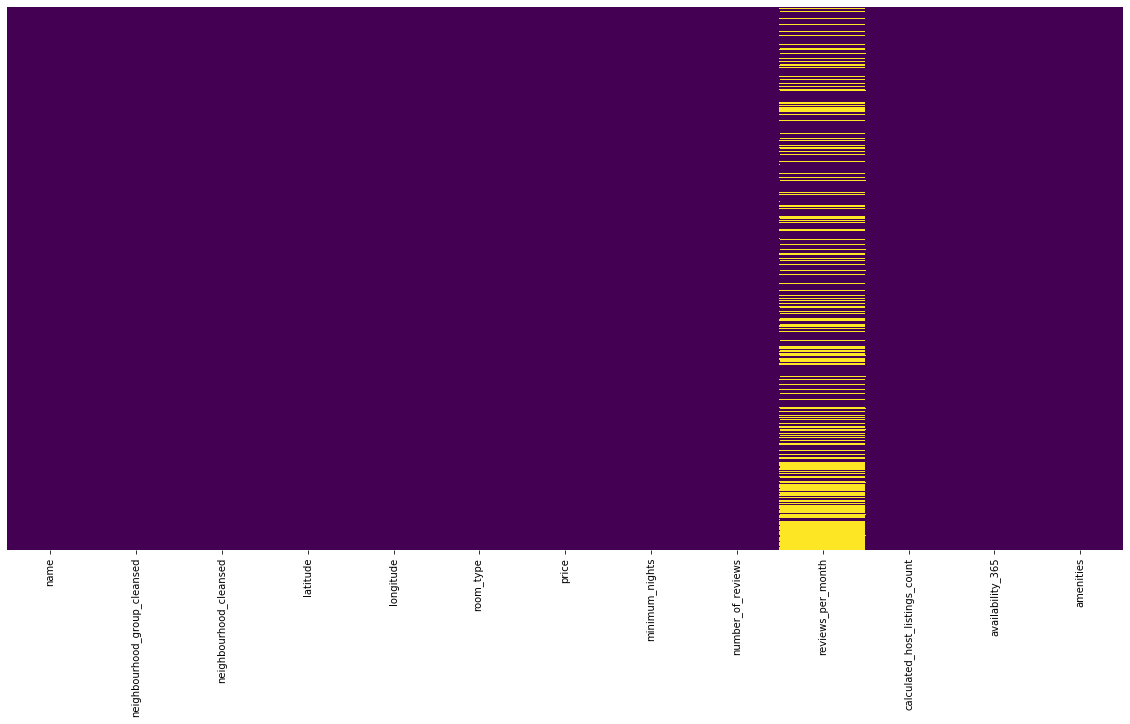

In [8]:
#Plotting those null values
plt.figure(figsize=(20,10))
sns.heatmap(listings.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
def cleandata(df):
    #drop unwanted columns
    df.dropna(subset=['name'],axis=0,inplace = True)
    # Change Price to float
    df['price'] = df.price.str.replace('$', '')
    df['price'] = df.price.str.replace(',', '')
    df['price'] = df.price.astype(float)
    return df

In [10]:
def filldata(series):    
       return series.fillna(series.median()) * 100

In [11]:
listings = cleandata(listings)
listings.reviews_per_month=listings["reviews_per_month"].transform(filldata)
listings.head()

name neighbourhood_group_cleansed  \
0    COZICOMFORT LONG TERM STAY ROOM 2                 North Region   
1      Pleasant Room along Bukit Timah               Central Region   
2                          COZICOMFORT                 North Region   
3  Ensuite Room (Room 1 & 2) near EXPO                  East Region   
4      B&B  Room 1 near Airport & EXPO                  East Region   

  neighbourhood_cleansed  latitude  longitude     room_type  price  \
0              Woodlands   1.44255  103.79580  Private room   87.0   
1            Bukit Timah   1.33235  103.78521  Private room   80.0   
2              Woodlands   1.44246  103.79667  Private room   72.0   
3               Tampines   1.34541  103.95712  Private room  214.0   
4               Tampines   1.34567  103.95963  Private room   99.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0             180                  1                1.0   
1              90                 18               25.0   
2               6                 20               19.0   
3               1                 20               20.0   
4               1                 24               23.0   

   calculated_host_listings_count  availability_365  \
0                               2               365   
1                               1               365   
2                               2               365   
3                               8               365   
4                               8               365   

                                           amenities  
0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  
1  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  
2  {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...  
3  {TV,Wifi,"Air conditioning",Kitchen,"Pets live...  
4  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7712 entries, 0 to 7712
Data columns (total 13 columns):
name                              7712 non-null object
neighbourhood_group_cleansed      7712 non-null object
neighbourhood_cleansed            7712 non-null object
latitude                          7712 non-null float64
longitude                         7712 non-null float64
room_type                         7712 non-null object
price                             7712 non-null float64
minimum_nights                    7712 non-null int64
number_of_reviews                 7712 non-null int64
reviews_per_month                 7712 non-null float64
calculated_host_listings_count    7712 non-null int64
availability_365                  7712 non-null int64
amenities                         7712 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 843.5+ KB


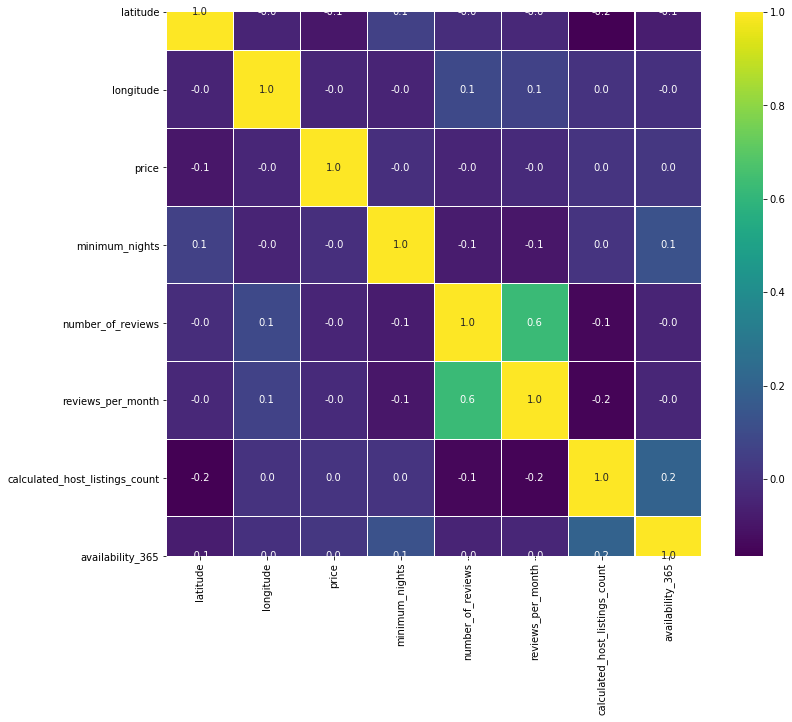

In [13]:
#Individual Co Relations between each set
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(listings.corr(),annot=True, linewidths=.1, fmt='.1f',ax=ax,cmap="viridis")
plt.show()

# Room types guests prefer

In [14]:
roomdf = listings.groupby('room_type').size()
labels = roomdf.index
values = roomdf.values
fig = px.pie(names=labels, values=values,title='Room Details')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

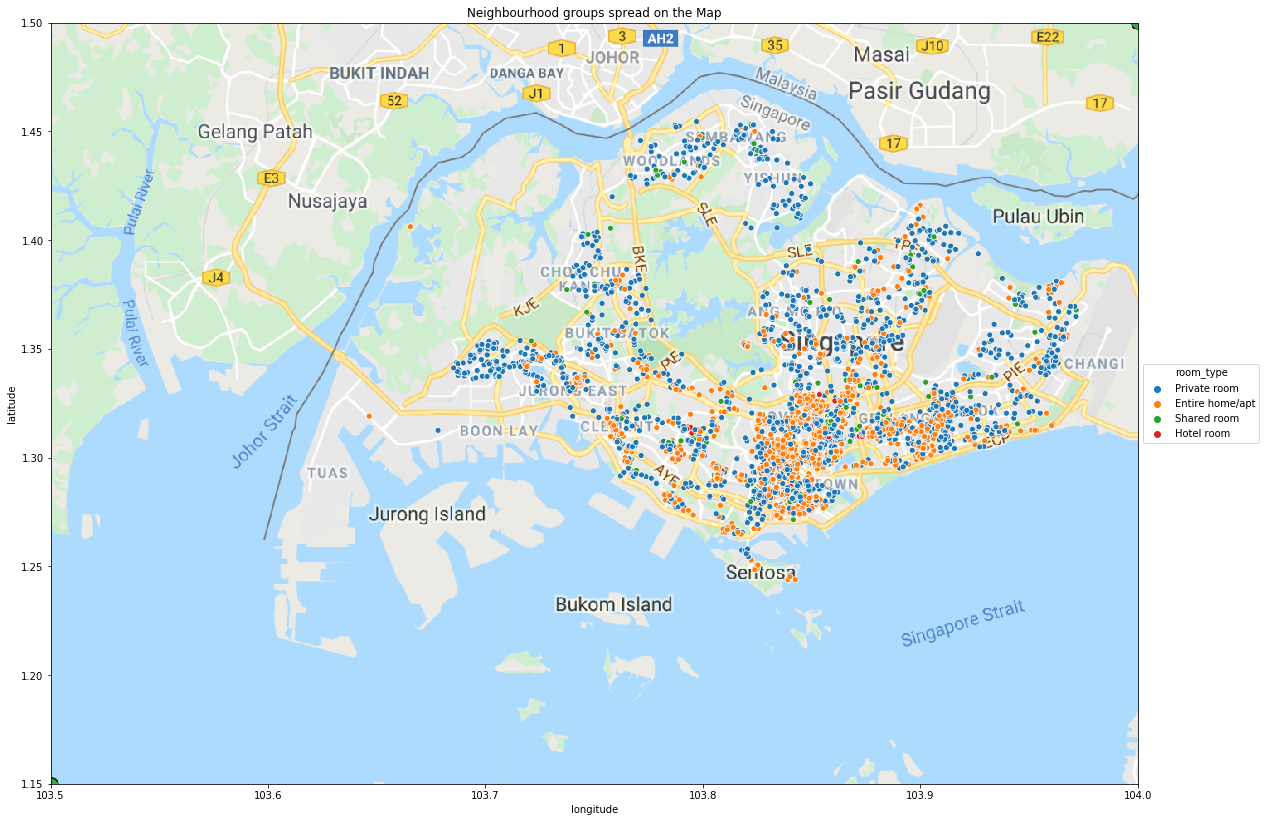

In [15]:
#plotting the above data on the singapore map
singapore_img = mpimg.imread('sgpmap.png')
plt.figure(figsize=(20,14))
sns.scatterplot(x='longitude',y='latitude',data=listings,hue='room_type');
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50]) 
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Neighbourhood groups spread on the Map")
plt.show()

# Maximum number of properties

In [16]:
nhbf = listings.groupby('neighbourhood_group_cleansed').size()
labels = nhbf.index
values = nhbf.values
fig = px.pie(names=labels, values=values,title='Neighbourhood Details')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

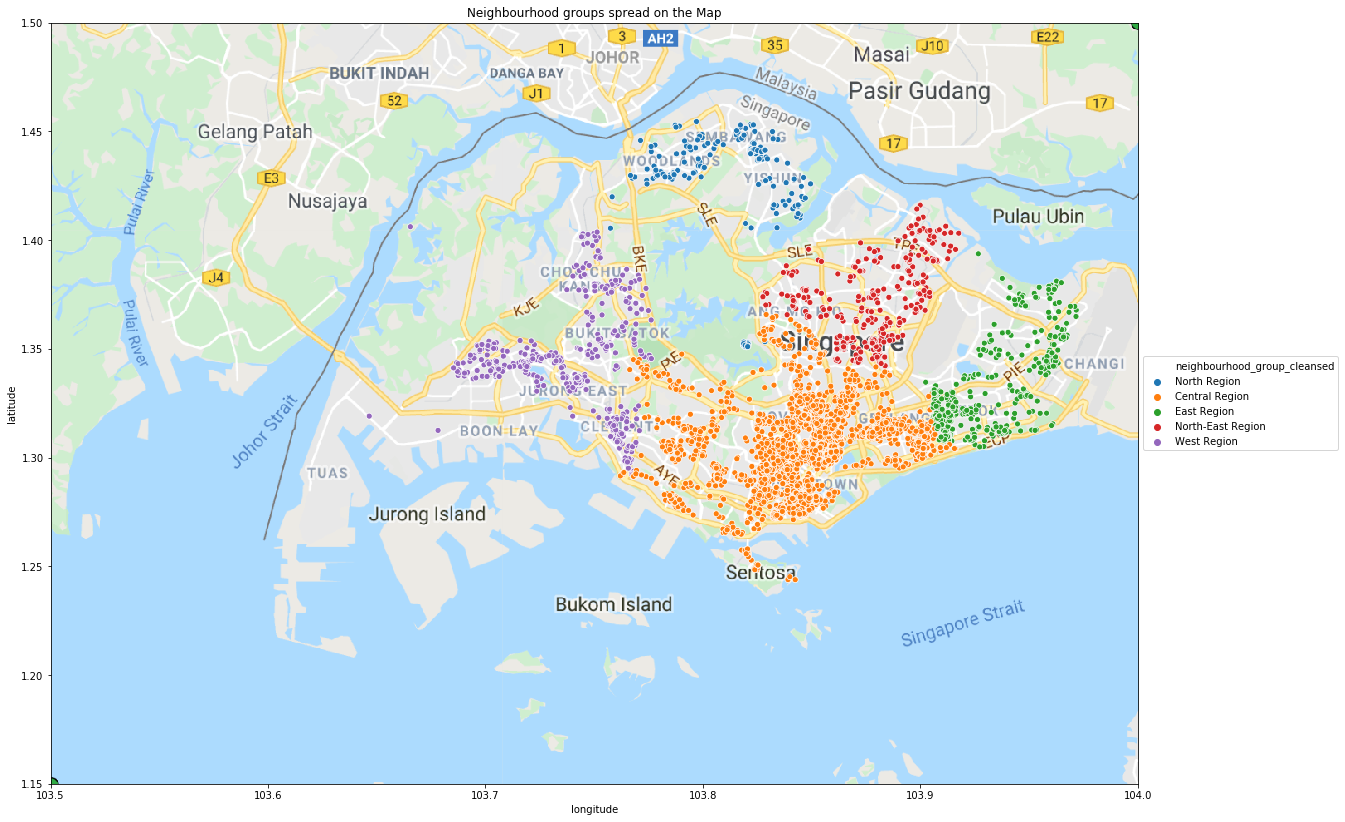

In [17]:
#plotting the above data on the singapore map
plt.figure(figsize=(20,14))
sns.scatterplot(x='longitude',y='latitude',data=listings,hue='neighbourhood_group_cleansed');
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50]) 
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Neighbourhood groups spread on the Map")
plt.show()

# Most expensive neighbourhoods

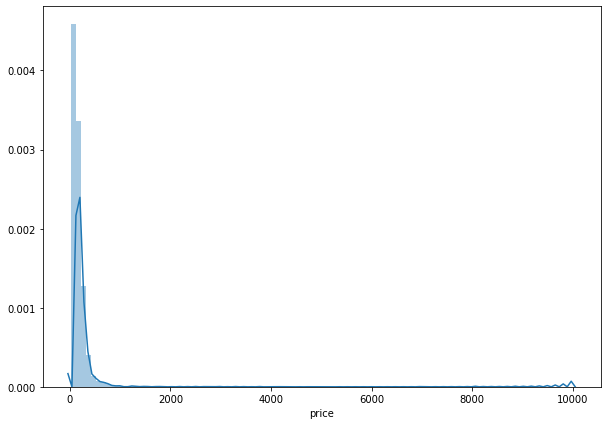

In [18]:
plt.figure(figsize=(10,7))
sns.distplot(listings['price'],bins = 100)

From the above graph we come to the conclusion that maximum properites in the singapore area are below the price of 500 dollars. So in the further analysis we will consider that as it will provide a good response

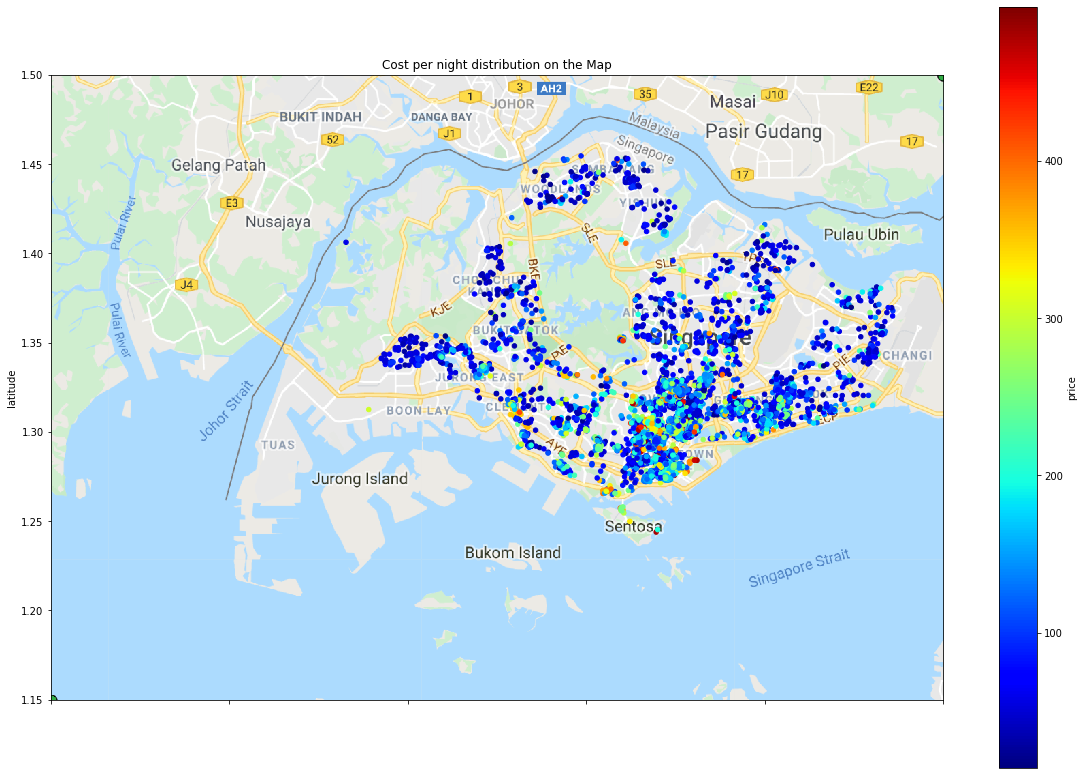

In [19]:
#plotting the cost of properties on the map of singapore
ulistings = listings[listings['price'] < 500]
ax = ulistings.plot(kind="scatter", x="longitude", y="latitude", c="price",figsize=(20,14), cmap=plt.get_cmap("jet"),colorbar=True);
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50]) 
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.title("Cost per night distribution on the Map")
plt.show()

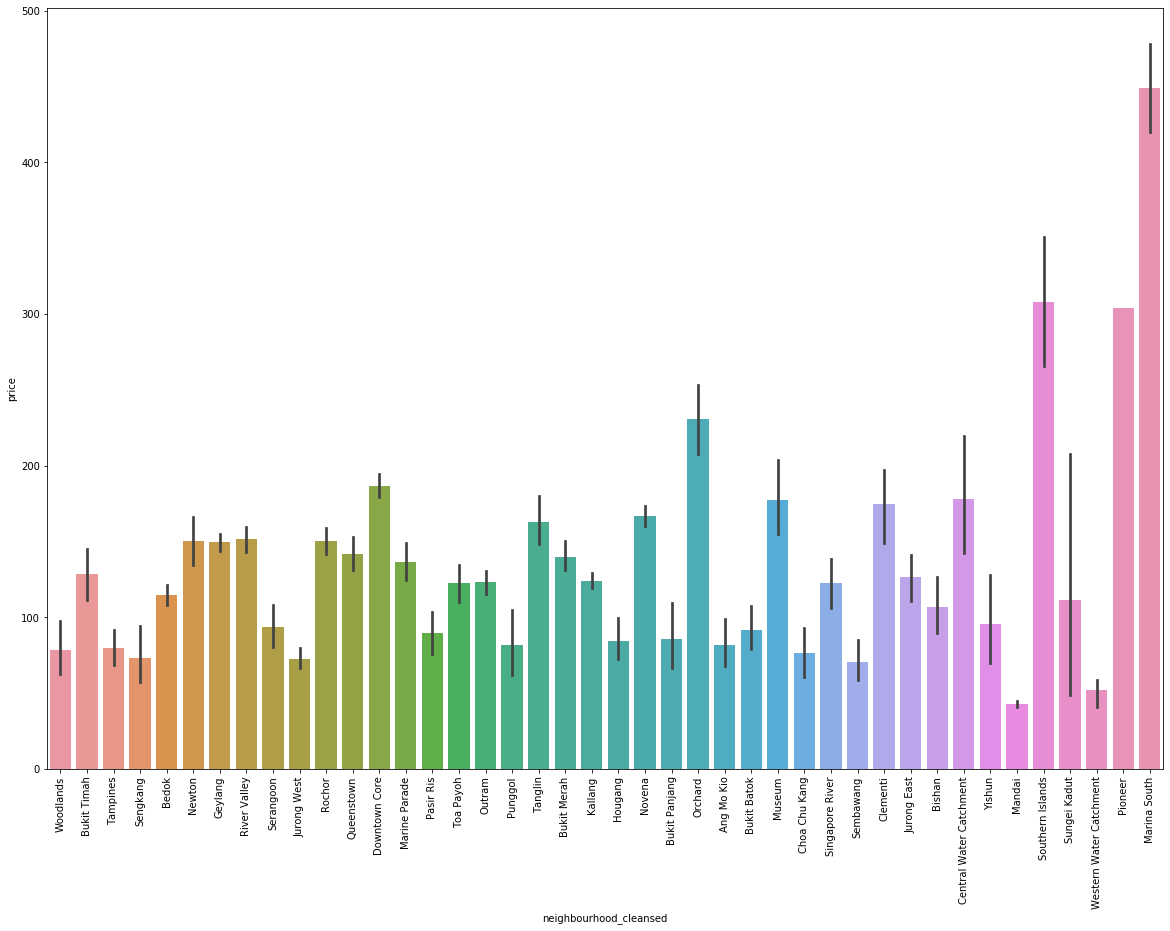

In [20]:
plt.figure(figsize=(20,14))
sns.barplot(x='neighbourhood_cleansed', y= 'price',data = ulistings)
plt.xticks(rotation=90)
plt.show()

# Most reviewed properties

In [21]:
#only taking the top 500 rated properties for analysis
reviews=listings.sort_values(by=['number_of_reviews'],ascending=False).head(500)
reviews.head()

name  \
117                  Luxuriously Spacious Studio Apt.   
1097                 Spacious room near Woodleigh MRT   
125   Heritage Shophouse Right in Epicentre of Sights   
628                Clean cosy room, 7 mins to Sentosa   
230                                     Central Haven   

     neighbourhood_group_cleansed neighbourhood_cleansed  latitude  longitude  \
117                   East Region                  Bedok   1.32122  103.91492   
1097               Central Region              Toa Payoh   1.33514  103.87622   
125                Central Region                 Outram   1.28448  103.84360   
628                Central Region            Bukit Merah   1.27718  103.82167   
230                Central Region                Tanglin   1.29312  103.82979   

            room_type  price  minimum_nights  number_of_reviews  \
117   Entire home/apt  139.0               2                367   
1097     Private room   49.0               1                352   
125      Private room   88.0               1                336   
628      Private room   72.0               3                322   
230   Entire home/apt  217.0               2                311   

      reviews_per_month  calculated_host_listings_count  availability_365  \
117               487.0                               1               259   
1097              713.0                               2               113   
125               531.0                               3               354   
628               586.0                               1               234   
230               472.0                               1               319   

                                              amenities  
117   {TV,"Cable TV",Internet,Wifi,"Air conditioning...  
1097  {Internet,Wifi,"Air conditioning",Kitchen,"Pai...  
125   {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...  
628   {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...  
230   {TV,"Cable TV",Internet,Wifi,"Air conditioning...

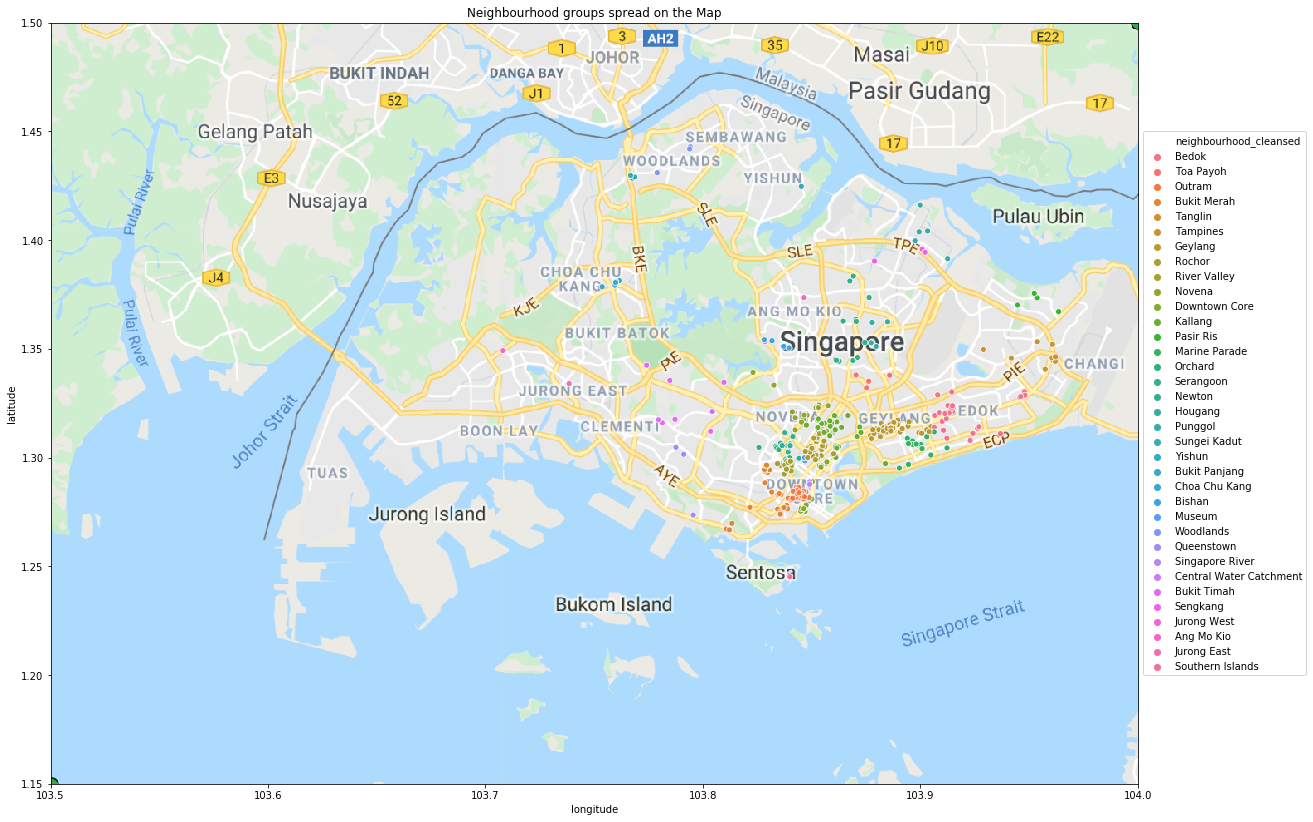

In [22]:
#plotting these highly rated properites on the map of singapore
plt.figure(figsize=(20,14))
sns.scatterplot(reviews.longitude,reviews.latitude,hue=reviews.neighbourhood_cleansed,cmap='jet');
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50]) 
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Neighbourhood groups spread on the Map")
plt.show()

# Availiblity of Rooms

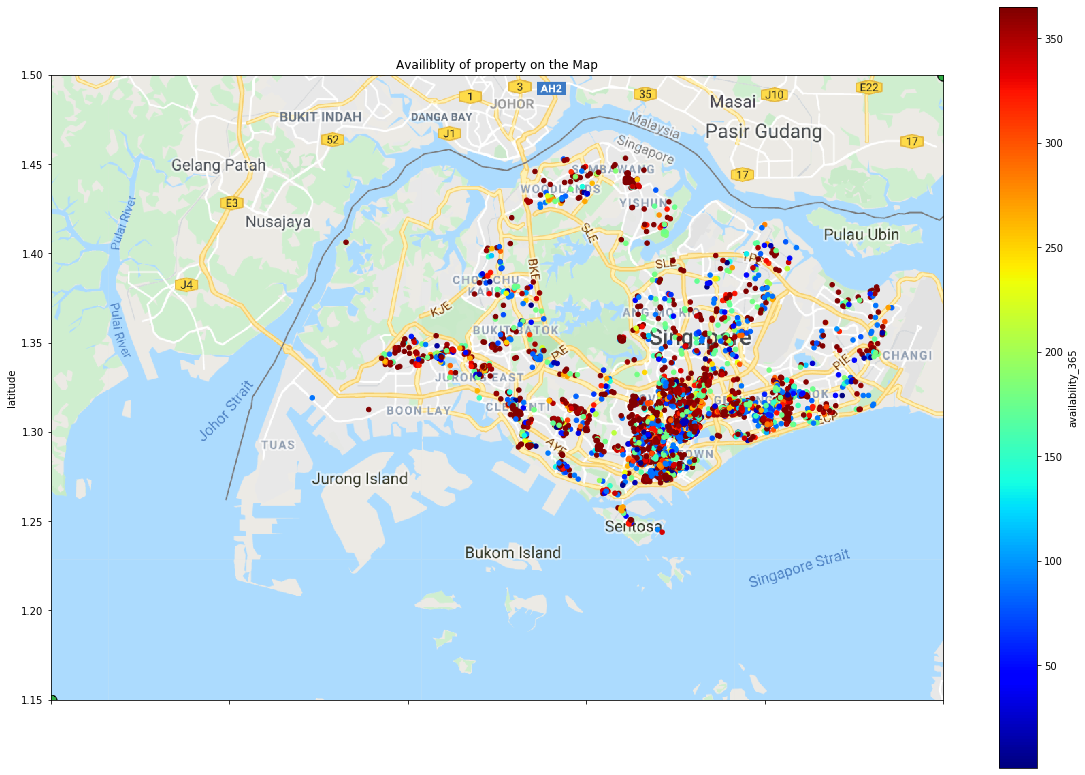

In [23]:
zlistings = listings[listings['availability_365'] > 0]
ax = zlistings.plot(kind="scatter", x="longitude", y="latitude", c="availability_365",figsize=(20,14), cmap=plt.get_cmap("jet"),colorbar=True);
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50]) 
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.title("Availiblity of property on the Map")
plt.show()

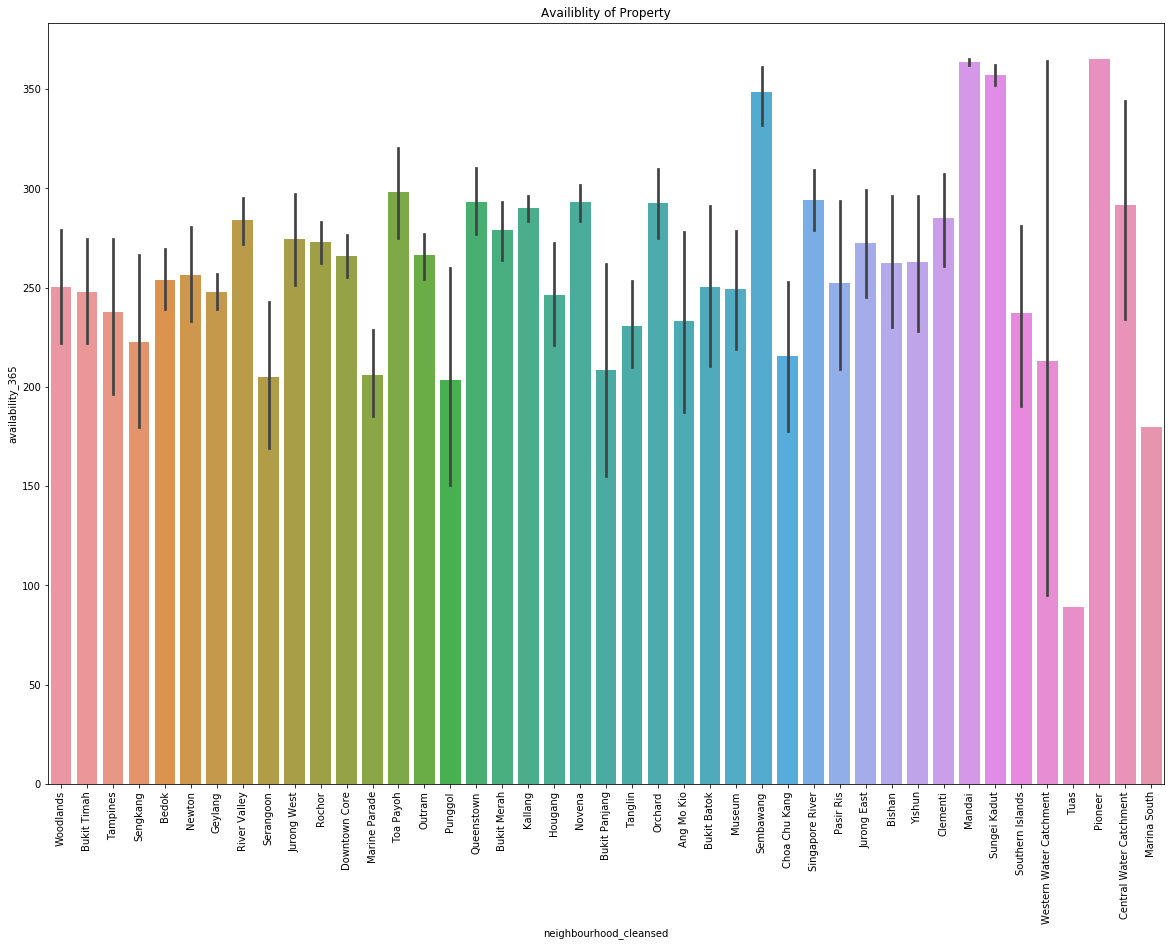

In [24]:
plt.figure(figsize=(20,14))
sns.barplot(x='neighbourhood_cleansed', y= 'availability_365',data = zlistings)
plt.xticks(rotation=90)
plt.title("Availiblity of Property")
plt.show()

# Basic amenties offered by AirBnB's in Singapore & price vs amenities

In [25]:
#Creating a separate file for amenties
amenities = np.array(listings['amenities'].map(lambda amns: amns.replace('"',"").replace('{',"").replace('}',"").split(',')))
amenitiesp = np.unique(np.concatenate(amenities))[1:]
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenitiesp if amn != ""]
amenity_cost = pd.DataFrame(amenity_prices, columns=['Feature', 'Value'])

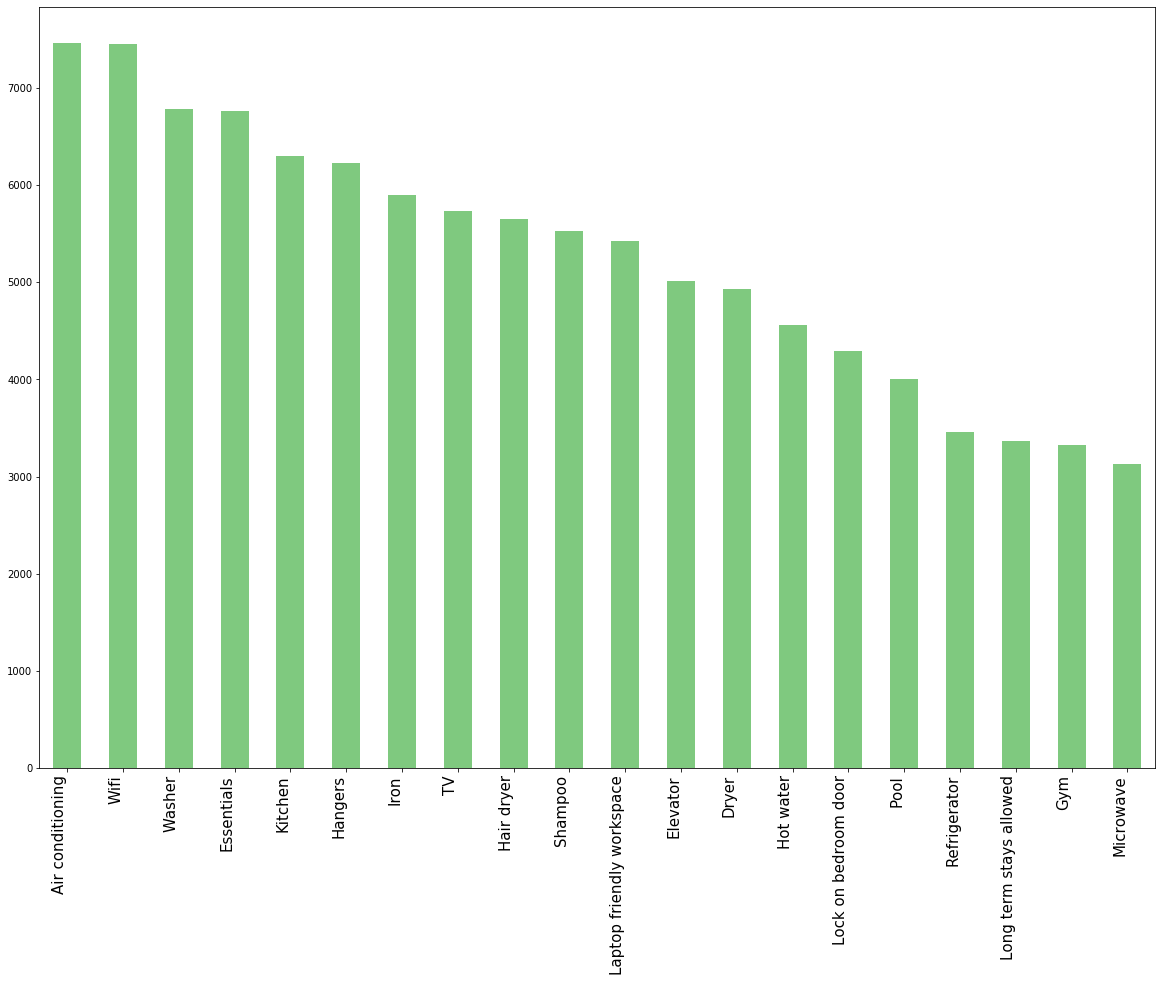

In [26]:
#Making a series of the top available amenities and plotting it
amenities = pd.Series(np.concatenate(amenities))
amenities_number = amenities.value_counts().head(20)
plt.figure(figsize=(20,14))
amenities_number.plot(kind='bar',cmap=plt.get_cmap('Accent'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=15)
plt.show();

In [27]:
#sorting the amenties with the price
amenity_cost.sort_values(by='Value', ascending=False,inplace = True)
amenity_cost.head(20)

Feature        Value
13             Beach essentials  1155.473684
9    Babysitter recommendations   780.089888
54                 Game console   739.361111
84                Outlet covers   617.181818
110                 Stair gates   443.000000
92                  Pocket wifi   393.349206
33                   Dishwasher   353.734440
94             Private bathroom   345.400000
45             Fireplace guards   331.600000
83                 Other pet(s)   329.727273
64                      Hot tub   325.608696
40          Ethernet connection   309.101695
30                         Crib   308.279264
62                   High chair   307.295222
86     Pack ’n Play/travel crib   303.904306
12                      Bathtub   299.038961
6                     BBQ grill   290.510978
25    Children’s books and toys   286.464567
28                 Coffee maker   281.518349
31        Disabled parking spot   248.125000

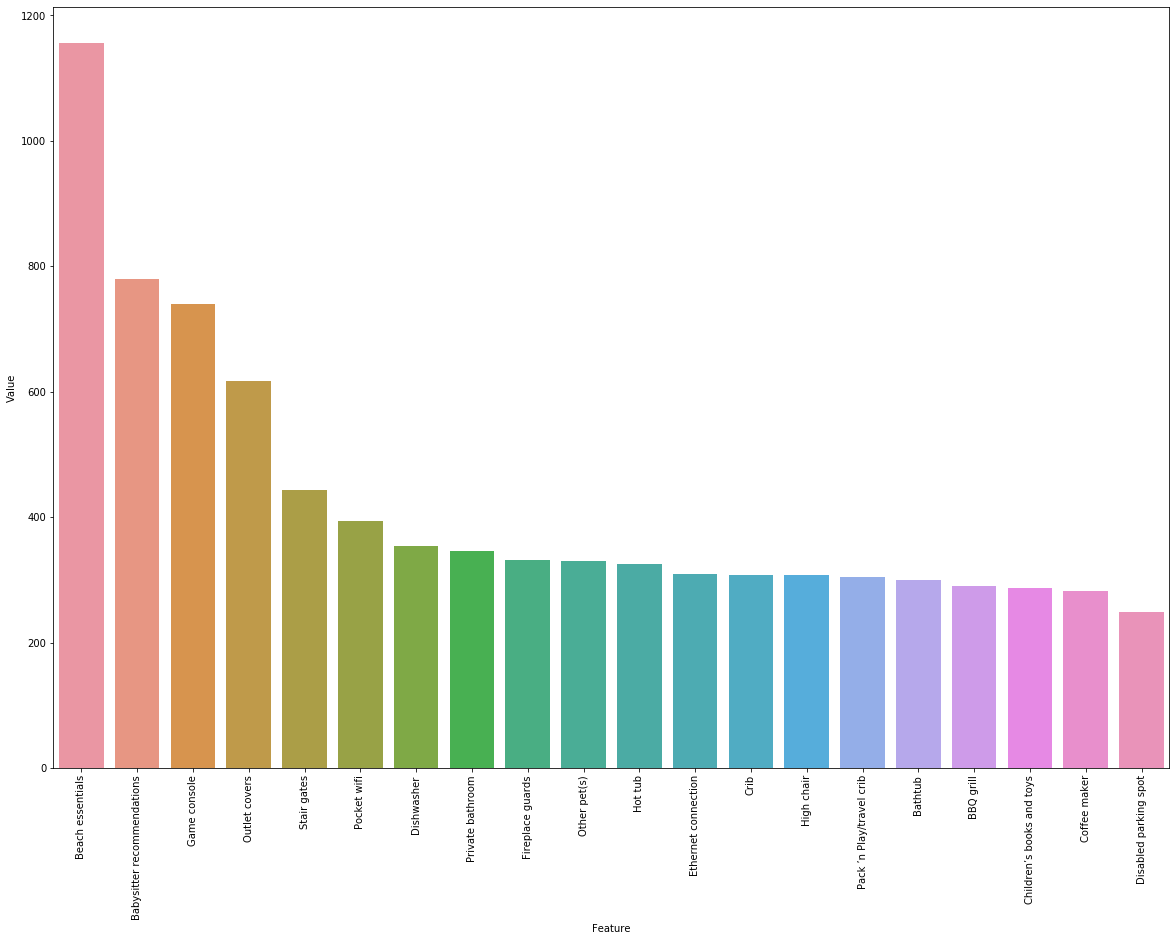

In [28]:
#plotting the above table
plt.figure(figsize=(20,14))
sns.barplot(x='Feature', y= 'Value',data = amenity_cost.head(20))
plt.xticks(rotation=90)
plt.show()

# Conclusions
    1. Most prefered Room type - Entire home/apt followed by private rooms. These both types of rooms are spread all oversingapore.
    2. Maximum number of properties - They are present in the central area of singapore which has the downtown, Merlion and the sentosa island.
    3. Most expensive area - Majority of the expensive properties are in the central area of singapore which includes neighbourhoods like Marina South, Pioneer, Southern Islands, centralwater Catchment etc.
    4. Most reviewed rooms - As the cnetral singapore has the maximum no of properties and it is one of the most epensive areas it has the maximum reviewed properties.
    5. Availiblity of rooms - they are all over singapore. Renting out homes has become as very booming business in singapore
    6. Amenities - We can various amenities provided by majority of the airbnbs. Also we can see that for some of the more luxury amenities are availiable only to the more expensive properities.